## Life Expectancy Analysis

# Introduction
The dataset used here is pulled from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?resource=download <br>
In this dataset, there are 21 input variables and 1 output variable.<br>
The descriptions of each variable are shown below.

# Variable description
Country<br>
Year<br>
Status: Developed or Developing status<br>
Life Expectancy (in age)<br>
Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)<br>
Infant deaths: Number of Infant Deaths per 1000 population<br>
Alcohol: recorded per capita (15+) consumption (in litres of pure alcohol)<br>
percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)<br>
Hepatitis B: HepB immunization coverage among 1-year-olds (%)<br>
Measles: Number of reported cases per 1000 population<br>
BMI: Average Body Mass Index of entire population<br>
under-five-deaths: Number of under-five deaths per 1000 population<br>
Polio: Pol3 immunization coverage among 1-year-olds (%)<br>
Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)<br>
Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)<br>
HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)<br>
GDP: Gross Domestic Product per capita (in USD)<br>
Population<br>
thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)<br>
thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)<br>
Income composition: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)<br>
Schooling: Number of years of Schooling(years)<br>

# Objective
Given the sample data, can we accurately predict the life expectancy in developing countries and developed countries respectively?

# Importing libraries

In [682]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [683]:
data = pd.read_csv('Life Expectancy Data.csv')
print('No. of rows and columns in the data set before cleaning: ',data.shape)
data = data.dropna()
print('No. of rows and columns in the data set without null values: ',data.shape)
data.head()

No. of rows and columns in the data set before cleaning:  (2938, 22)
No. of rows and columns in the data set without null values:  (1649, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


First, we load the data from our csv file.<br>
We then remove the null values and display the first 5 entries of the cleaned data set.

# Categorizing the data

No. of elements corresponding to developing countries:  1407
No. of elements corresponding to developed countries:  242


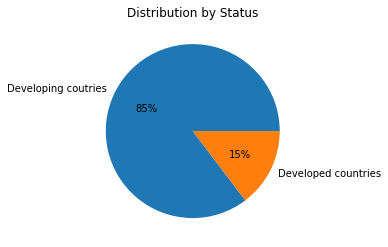

In [684]:
data = data.drop(columns='Country')
devgdata = data.loc[data['Status'] == 'Developing']
devgdata = devgdata.drop(columns='Status')
print('No. of elements corresponding to developing countries: ',devgdata.shape[0])
devddata = data.loc[data['Status'] == 'Developed']
devddata = devddata.drop(columns='Status')
print('No. of elements corresponding to developed countries: ',devddata.shape[0])

# Pie chart
data = [devgdata.shape[0], devddata.shape[0]]
labels = ['Developing coutries', 'Developed countries']
plt.pie(data, labels = labels, autopct = '%.0f%%')
plt.title('Distribution by Status')
plt.show()

Since we are categorizing by status, we can remove the 'countries' column.<br>
We separate the dataset into 2 dataframes, one containing data of developing countries and the other for developed countries.<br>
We then remove the 'Status' column from both dataframes.<br>
A pie chart is also added to show the distribution of elements by 'Status'.

# Partitioning the data

In [685]:
from sklearn.model_selection import train_test_split

devgX = devgdata.drop(columns='Life expectancy') # Independent variable for developing countries
devgy = devgdata['Life expectancy'] # Dependent variable for developing countries
devdX = devddata.drop(columns='Life expectancy') # Independent variable for developed countries
devdy = devddata['Life expectancy'] # Dependent variable for developed countries

# Developing countries
devgX_train, devgX_test, devgy_train, devgy_test = train_test_split(devgX,devgy,test_size=0.3,random_state=23)
# Developed countries
devdX_train, devdX_test, devdy_train, devdy_test = train_test_split(devdX,devdy,test_size=0.3,random_state=23)

70% of the data would be used to train the model and 30% would test
the accuracy of the model.

# Model predictions

In [686]:
from sklearn.linear_model import LinearRegression

devgmodel = LinearRegression()
devdmodel = LinearRegression()

# Developing countries
devgmodel = devgmodel.fit(devgX_train,devgy_train)
train_devgmodel = devgmodel.predict(devgX_train)
test_devgmodel = devgmodel.predict(devgX_test)
# Developed countries
devdmodel = devdmodel.fit(devdX_train,devdy_train)
train_devdmodel = devdmodel.predict(devdX_train)
test_devdmodel = devdmodel.predict(devdX_test)

The training data is used to create a linear model regressing“Life expectancy” against the other variables.<br>
We then make predictions with the model for both our training data and testing data for the two types of countries.

# Plotting the models

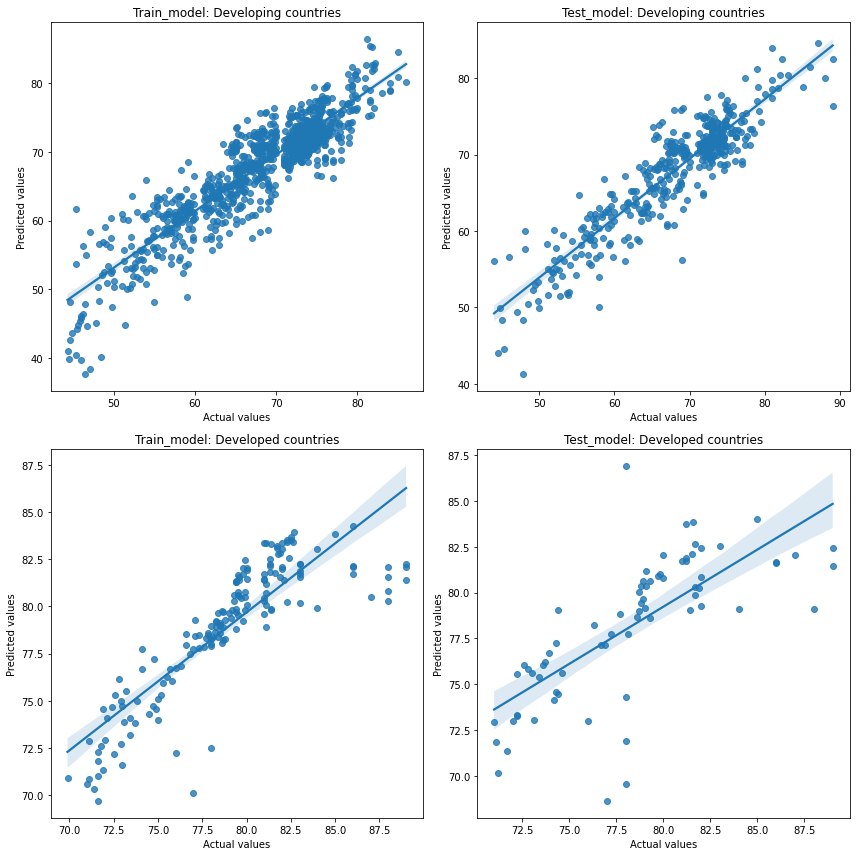

In [687]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(12,12))

# Training model for developing countries
train_devgDF = pd.DataFrame({'Actual values': devgy_train, 'Predicted values': train_devgmodel}, columns = ['Actual values','Predicted values'])
sns.regplot(x = 'Actual values', y = 'Predicted values', data = train_devgDF, ax = axes[0,0]).set(title = 'Train_model: Developing countries')

# Testing model for developing countries
test_devgDF = pd.DataFrame({'Actual values': devgy_test, 'Predicted values': test_devgmodel}, columns = ['Actual values','Predicted values'])
sns.regplot(x = 'Actual values', y = 'Predicted values', data = test_devgDF, ax = axes[0,1]).set(title = 'Test_model: Developing countries')

# Training model for developed countries
train_devdDF = pd.DataFrame({'Actual values': devdy_train, 'Predicted values': train_devdmodel}, columns = ['Actual values','Predicted values'])
sns.regplot(x = 'Actual values', y = 'Predicted values', data = train_devdDF, ax = axes[1,0]).set(title = 'Train_model: Developed countries')

# Testing model for developed countries
test_devdDF = pd.DataFrame({'Actual values': devdy_test, 'Predicted values': test_devdmodel}, columns = ['Actual values','Predicted values'])
sns.regplot(x = 'Actual values', y = 'Predicted values', data = test_devdDF, ax = axes[1,1]).set(title = 'Test_model: Developed countries')

fig.tight_layout()

The above plots show the values of predicted (x-axis) and actual (y-axix) values for the 4 models.<br>
The further the points stray away from the line, the less accurate the model is.<br>
<br>
Training model for developing countries:<br>
The results become more accurate as the values increase since the points become more clustered to the top right.<br>
<br>
Testing model for developing countries:<br>
It shows a similar pattern with the training plot. The results become more accurate for larger values.<br>
<br>
Training model for developed countries:<br>
The results are less accurate than that of developing countries which can be attributed to a smaller sample size.<br>
<br>
Testing model for developed countries:<br>
It shows a similar pattern with the training plot.

# Summary of the model for developing countries

In [688]:
from statsmodels.api import OLS

OLS(devgy_train,devgX_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Life expectancy   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          1.810e+04
Date:                Fri, 24 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:24:20   Log-Likelihood:                         -2658.9
No. Observations:                 984   AIC:                                      5356.
Df Residuals:                     965   BIC:                                      5449.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Year                                0.0263      0.000     56.384      0.000       0.025       0.027
Adult Mortality                    -0.0153      0.001    -13.242      0.000      -0.018      -0.013
infant deaths                       0.0896      0.012      7.411      0.000       0.066       0.113
Alcohol                            -0.1432      0.043     -3.304      0.001      -0.228      -0.058
percentage expenditure              0.0009      0.000      2.733      0.006       0.000       0.002
Hepatitis B                        -0.0047      0.006     -0.766      0.444      -0.017       0.007
Measles                         -1.325e-05   1.41e-05     -0.939      0.348   -4.09e-05    1.44e-05
BMI                                 0.0339      0.008      4.074      0.000       0.018       0.050
under-five deaths                  -0.0669      0.009     -7.724      0.000      -0.084      -0.050
Polio                               0.0094      0.007      1.409      0.159      -0.004       0.023
Total expenditure                   0.0816      0.055      1.472      0.141      -0.027       0.190
Diphtheria                          0.0144      0.007      1.919      0.055      -0.000       0.029
HIV/AIDS                           -0.4236      0.021    -20.395      0.000      -0.464      -0.383
GDP                             -2.727e-05   5.14e-05     -0.531      0.596      -0.000    7.35e-05
Population                      -5.906e-10   2.58e-09     -0.229      0.819   -5.65e-09    4.47e-09
 thinness  1-19 years              -0.0429      0.065     -0.662      0.508      -0.170       0.084
 thinness 5-9 years                -0.0306      0.064     -0.480      0.632      -0.156       0.095
Income composition of resources     8.3050      1.052      7.893      0.000       6.240      10.370
Schooling                           0.9679      0.081     11.913      0.000       0.808       1.127
==============================================================================
Omnibus:                       36.572   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.988
Skew:                          -0.342   Prob(JB):                     3.12e-12
Kurtosis:                       3.908   Cond. No.                     5.56e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.56e+08. This might indicate that there are
strong multicollinearity or other n

With an adjusted R-squared value of 0.997, this model fits the data extremely well.<br>
Only about 0.3% of the data cannot be explained by the model.<br>
Significant variables include 'Adult Mortality', 'BMI', 'Alcohol', 'Schooling', etc.

# Residual values for specific variables

[Text(0.5, 1.0, 'Residuals of Schooling')]

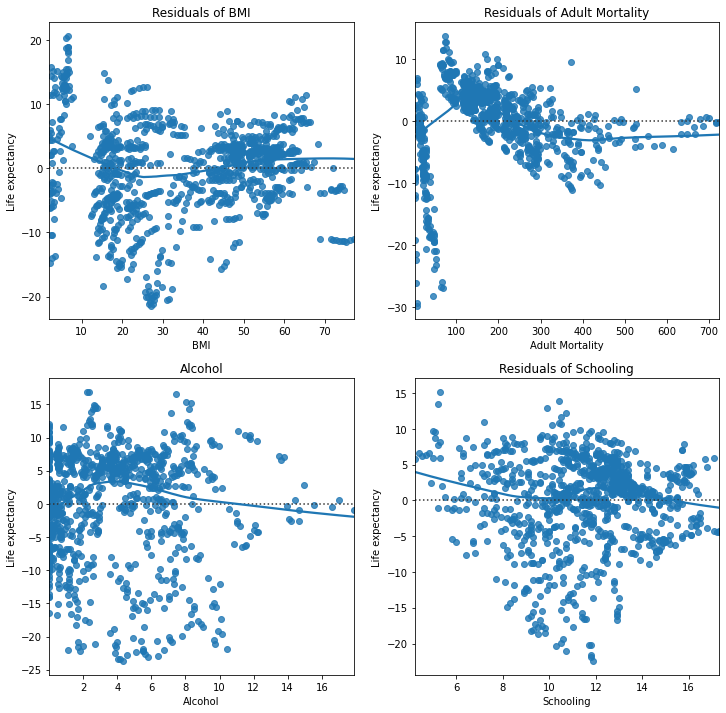

In [689]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(12,12))

sns.residplot(x=devgX_train['BMI'], y=devgy_train, lowess=True, ax = axes[0,0]).set(title = 'Residuals of BMI')
sns.residplot(x=devgX_train['Adult Mortality'], y=devgy_train, lowess=True, ax = axes[0,1]).set(title = 'Residuals of Adult Mortality')
sns.residplot(x=devgX_train['Alcohol'], y=devgy_train, lowess=True, ax = axes[1,0]).set(title = 'Alcohol')
sns.residplot(x=devgX_train['Schooling'], y=devgy_train, lowess=True, ax = axes[1,1]).set(title = 'Residuals of Schooling')

The above 4 graphs show the residuals of a few significant variables.<br>
In all of the graphs, the line is more or less around the 0 point for life expectancy.

# Residuals for the entire model

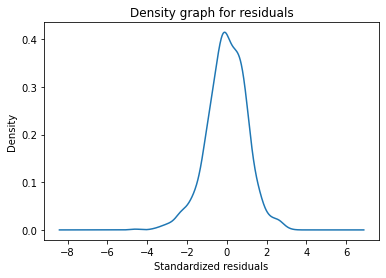

In [690]:
# Getting residuals
influence = OLS(devgy_train,devgX_train).fit().get_influence()
residuals = influence.resid_studentized_internal

# Density plot
df = pd.DataFrame(residuals)
df.plot(kind = 'density',legend=False)
plt.title("Density graph for residuals")
plt.xlabel("Standardized residuals")
plt.show()

As shown in the graph, the line significantly resembles a gaussian curve.<br>
This indicates that the model fits the data very well.

# Summary of the model for developed countries

In [691]:
from statsmodels.api import OLS

OLS(devdy_train,devdX_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life expectancy   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     22.67
Date:                Fri, 24 Jun 2022   Prob (F-statistic):           5.32e-34
Time:                        22:24:21   Log-Likelihood:                -370.12
No. Observations:                 169   AIC:                             778.2
Df Residuals:                     150   BIC:                             837.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Year                                0.1765      0.052      3.372      0.001       0.073       0.280
Adult Mortality                    -0.0016      0.004     -0.391      0.697      -0.009       0.006
infant deaths                       0.2477      0.572      0.433      0.666      -0.883       1.378
Alcohol                            -0.1046      0.093     -1.121      0.264      -0.289       0.080
percentage expenditure              0.0002      0.000      1.077      0.283      -0.000       0.001
Hepatitis B                         0.0178      0.010      1.865      0.064      -0.001       0.037
Measles                            -0.0001   8.77e-05     -1.457      0.147      -0.000    4.56e-05
BMI                                -0.0211      0.011     -1.944      0.054      -0.043       0.000
under-five deaths                   0.1328      0.495      0.268      0.789      -0.845       1.111
Polio                              -0.0017      0.028     -0.060      0.952      -0.058       0.054
Total expenditure                  -0.1173      0.084     -1.395      0.165      -0.283       0.049
Diphtheria                         -0.0831      0.053     -1.570      0.118      -0.188       0.021
HIV/AIDS                        -2794.8105   1016.555     -2.749      0.007   -4803.426    -786.195
GDP                              -2.95e-05   2.98e-05     -0.992      0.323   -8.83e-05    2.93e-05
Population                      -3.771e-09   1.23e-08     -0.306      0.760   -2.81e-08    2.06e-08
 thinness  1-19 years              -2.6514      2.396     -1.107      0.270      -7.385       2.082
 thinness 5-9 years                -0.3008      2.151     -0.140      0.889      -4.551       3.949
Income composition of resources    25.7528      8.662      2.973      0.003       8.637      42.869
Schooling                          -0.2589      0.168     -1.543      0.125      -0.590       0.073
==============================================================================
Omnibus:                       71.510   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.685
Skew:                           1.840   Prob(JB):                     4.77e-41
Kurtosis:                       6.581   Cond. No.                     1.24e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With an adjusted R-squared value of 0.699, this model does not fit the data as well as that of developing countries.<br>
Around 30% of the data cannot be explained by the model.

# Conclusion
Looking at the model summaries, it can be concluded that we are able to accurately predict life expectancy in developing countries but not in developed countries using regression.<br>
Other methods may be required to extract more accurate results for developed countries.